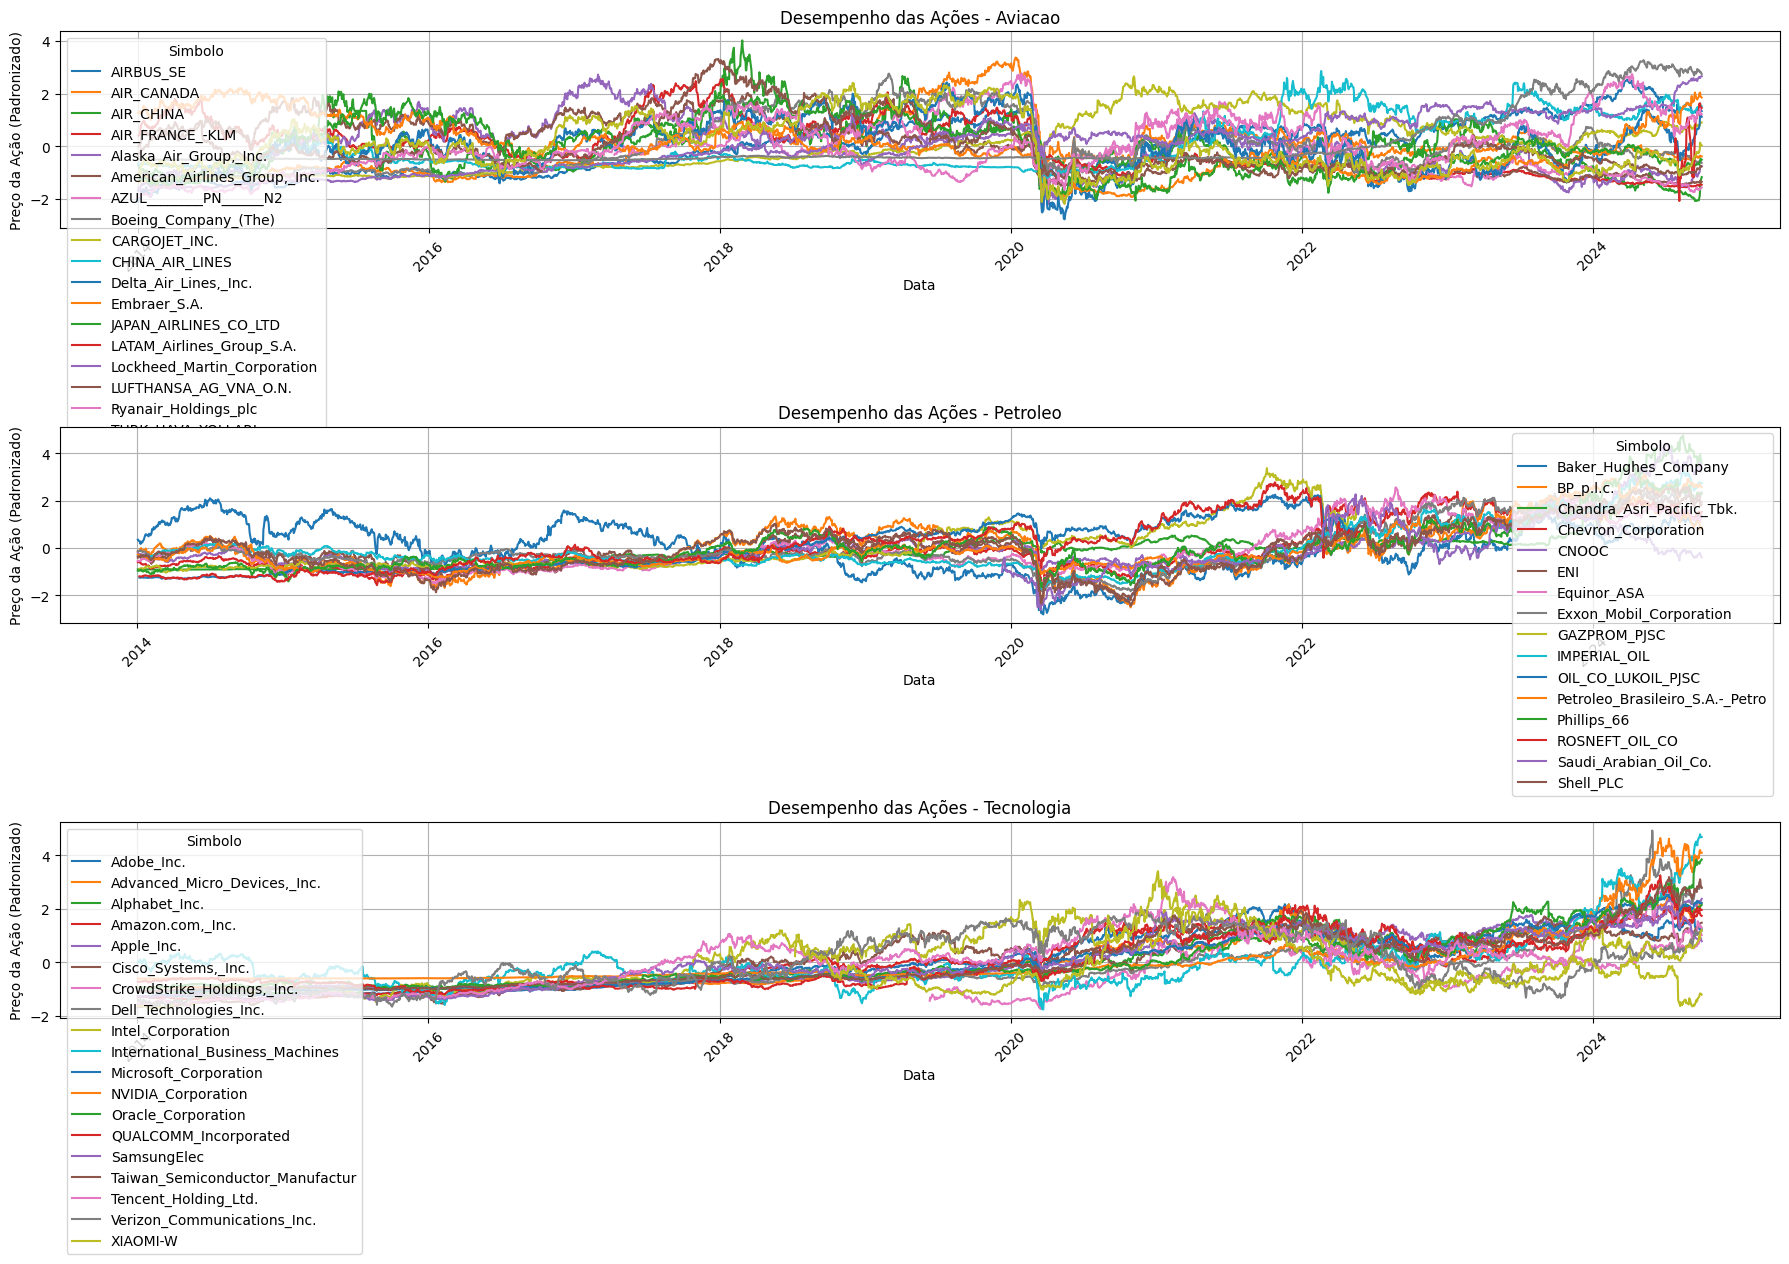

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_graficos_acoes():
    # Caminho do arquivo concatenado
    csv_file = r'C:\Projetos\Projeto5\Dados\concatenado2.csv'
    
    # Ler o CSV concatenado
    df = pd.read_csv(csv_file)
    
    # Converter a coluna 'Data' para o formato datetime
    df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')

    # Listar os ramos de interesse
    ramos = ['Aviacao', 'Petroleo', 'Tecnologia']  # Adicione mais ramos conforme necessário
    
    # Criar uma figura para os gráficos, com número de linhas igual ao número de ramos
    num_ramos = len(ramos)
    plt.figure(figsize=(18, 4 * num_ramos))  # Ajusta a altura com base no número de ramos

    # Loop através dos ramos e plotar os gráficos de linha
    for i, ramo in enumerate(ramos, 1):
        # Filtrar o DataFrame para o ramo atual
        df_ramo = df[df['Ramo'] == ramo]
        
        # Criar gráfico para o ramo atual
        plt.subplot(num_ramos, 1, i)  # Ajusta o número de subplots com base em num_ramos
        for simbolo in df_ramo['Simbolo'].unique():
            dados_empresa = df_ramo[df_ramo['Simbolo'] == simbolo]
            plt.plot(dados_empresa['Data'], dados_empresa['Ultimo_Padronizado'], label=simbolo)
        
        # Configurações do gráfico
        plt.title(f'Desempenho das Ações - {ramo}')
        plt.xlabel('Data')
        plt.ylabel('Preço da Ação (Padronizado)')
        plt.xticks(rotation=45)
        plt.legend(title='Simbolo')
        plt.grid()

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Executar a função
plotar_graficos_acoes()


# Exibição gráfica da média dos valores

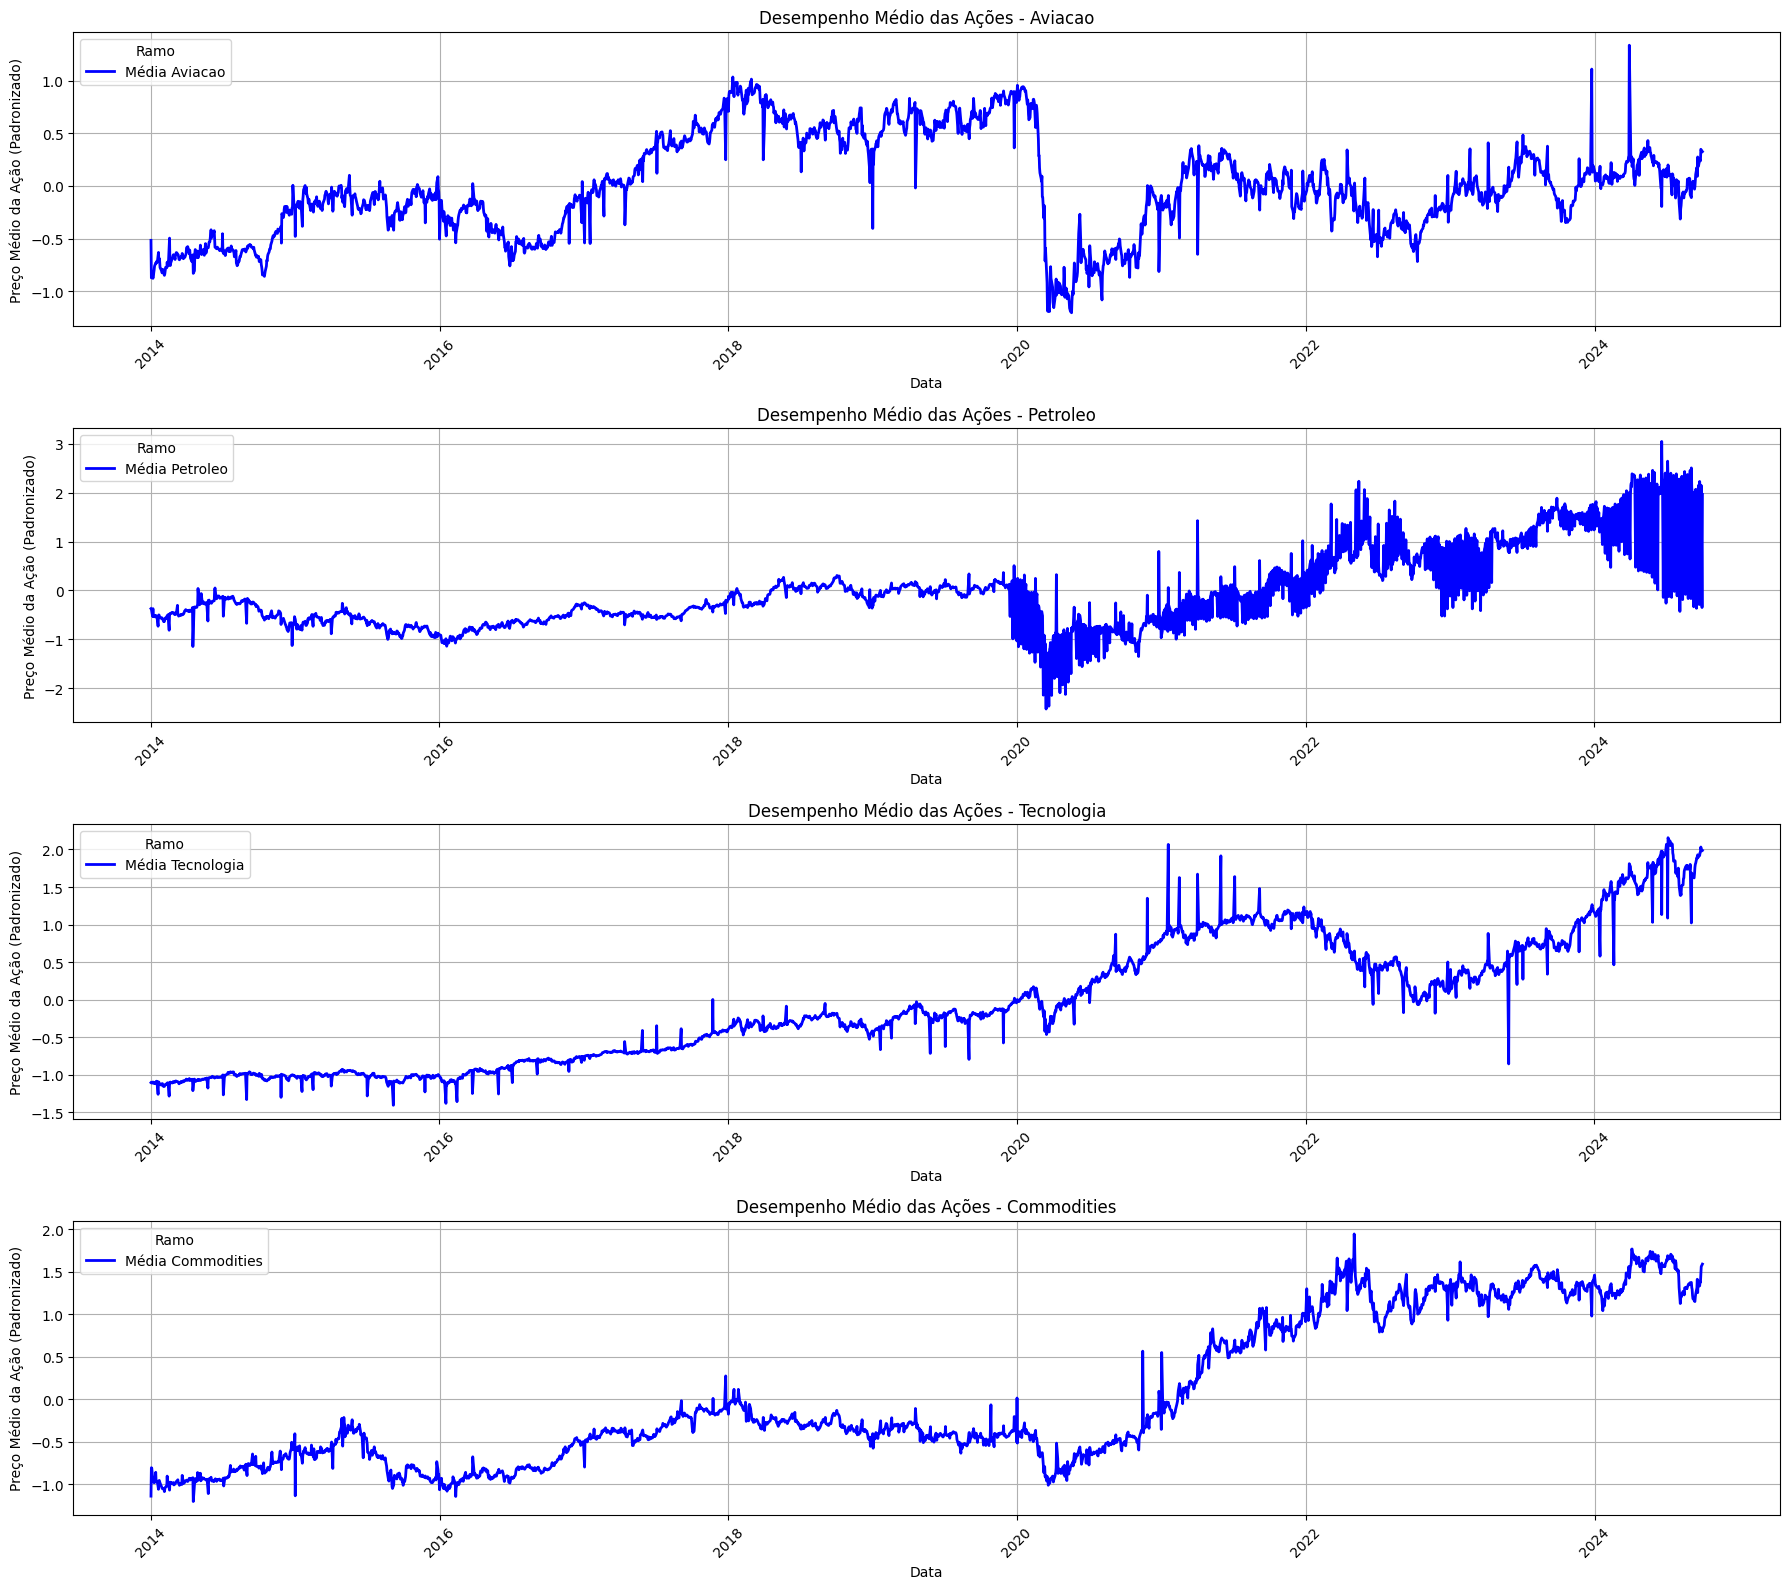

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_linha_media_ramos():
    # Caminho do arquivo concatenado
    csv_file = r'C:\Projetos\Projeto5\Dados\concatenado2.csv'
    
    # Ler o CSV concatenado
    df = pd.read_csv(csv_file)
    
    # Converter a coluna 'Data' para o formato datetime
    df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')

    # Listar os ramos de interesse
    ramos = ['Aviacao', 'Petroleo', 'Tecnologia', 'Commodities']  # Adicione mais ramos conforme necessário
    
    # Criar uma figura para os gráficos, com número de linhas igual ao número de ramos
    num_ramos = len(ramos)
    plt.figure(figsize=(18, 4 * num_ramos))  # Ajusta a altura com base no número de ramos

    # Loop através dos ramos e plotar apenas a linha média
    for i, ramo in enumerate(ramos, 1):
        # Filtrar o DataFrame para o ramo atual
        df_ramo = df[df['Ramo'] == ramo]
        
        # Calcular a linha média do ramo
        df_media = df_ramo.groupby('Data')['Ultimo_Padronizado'].mean().reset_index()
        
        # Criar gráfico para a linha média do ramo
        plt.subplot(num_ramos, 1, i)
        plt.plot(df_media['Data'], df_media['Ultimo_Padronizado'], label=f'Média {ramo}', color='blue', linestyle='-', linewidth=2)

        # Configurações do gráfico
        plt.title(f'Desempenho Médio das Ações - {ramo}')
        plt.xlabel('Data')
        plt.ylabel('Preço Médio da Ação (Padronizado)')
        plt.xticks(rotation=45)
        plt.legend(title='Ramo')
        plt.grid()

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Executar a função
plotar_linha_media_ramos()


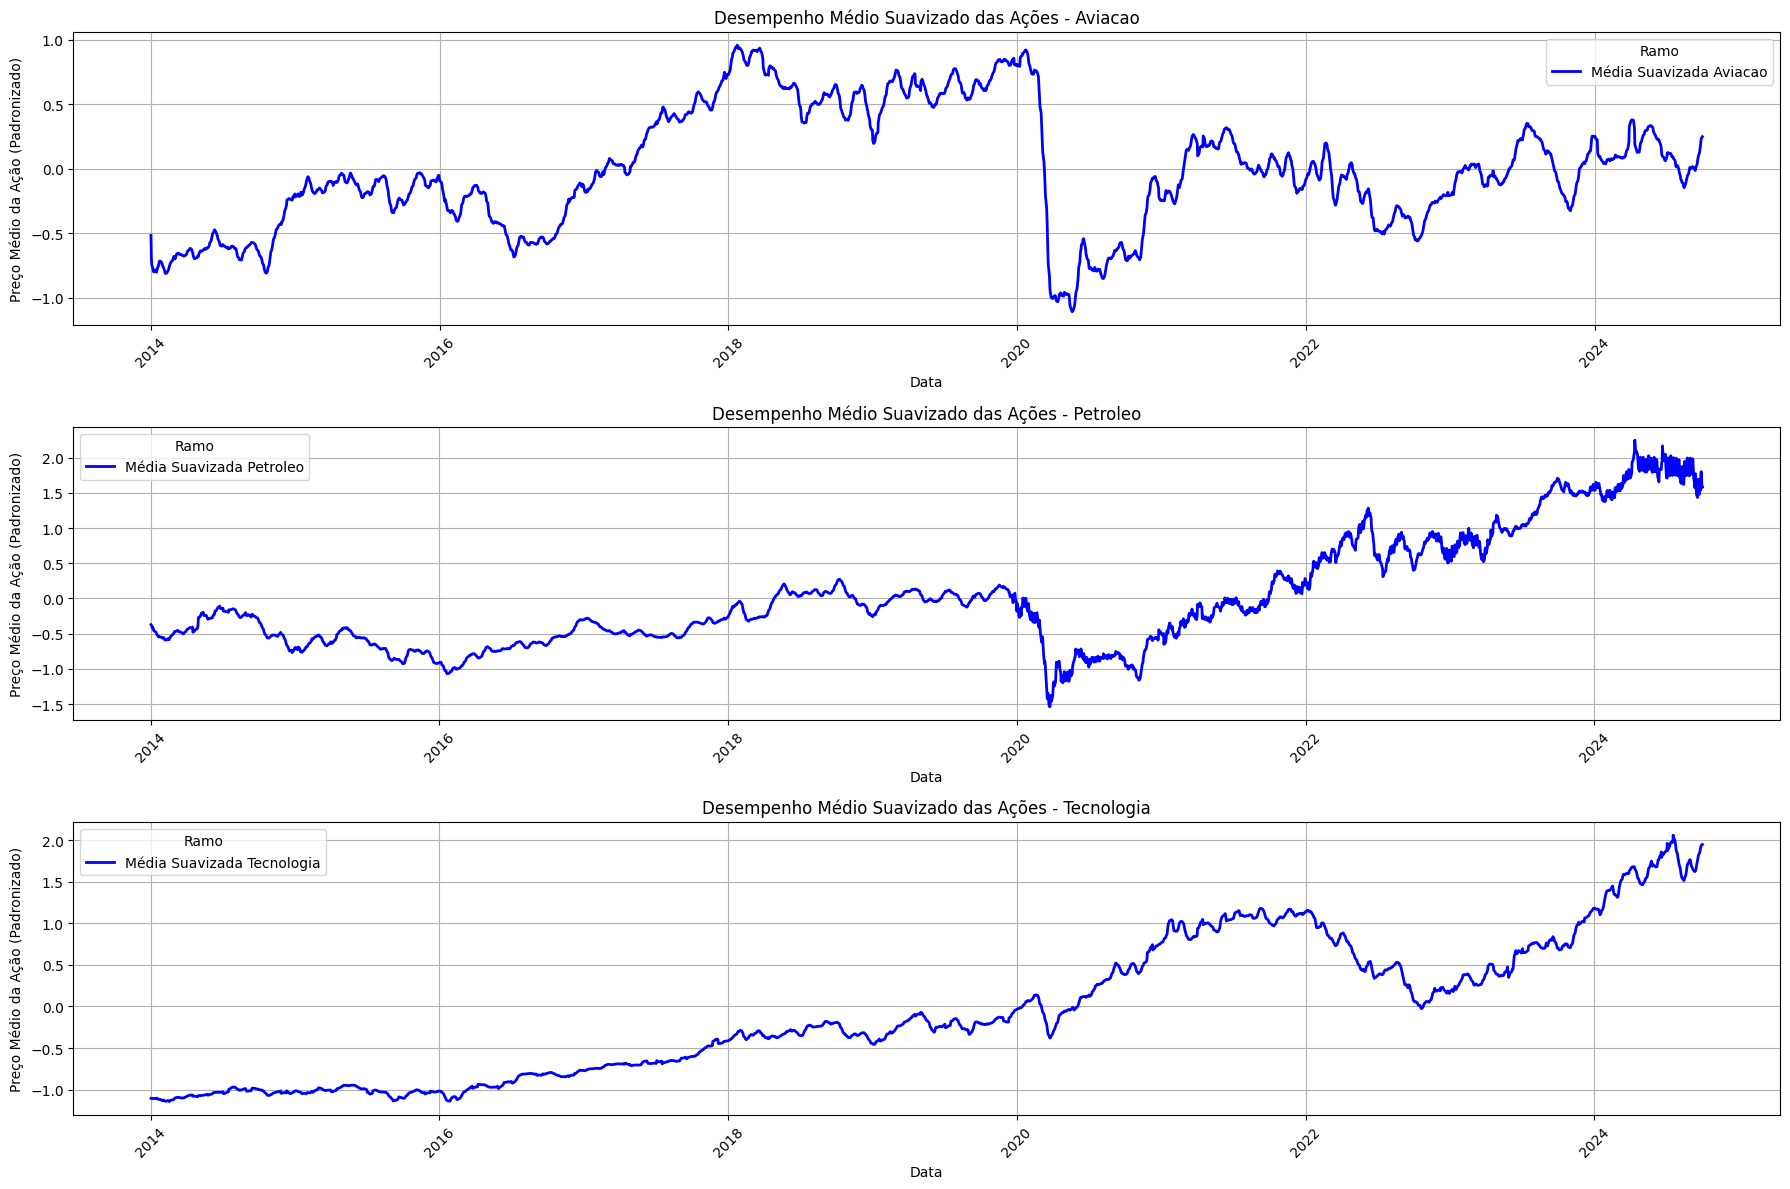

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_linha_media_ramos_com_suavizacao():
    # Caminho do arquivo concatenado
    csv_file = r'C:\Projetos\Projeto5\Dados\concatenado2.csv'
    
    # Ler o CSV concatenado
    df = pd.read_csv(csv_file)
    
    # Converter a coluna 'Data' para o formato datetime
    df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')

    # Listar os ramos de interesse
    # ramos = ['Aviacao', 'Petroleo', 'Tecnologia', 'Commodities', 'IndustriaAutomotiva', 'MercadoImobiliario', 'Saude', 'ServicosFinanceiros', 'TransporteLogistica']  # Adicione mais ramos conforme necessário
    ramos = ['Aviacao', 'Petroleo', 'Tecnologia']

    # Criar uma figura para os gráficos, com número de linhas igual ao número de ramos
    num_ramos = len(ramos)
    plt.figure(figsize=(18, 4 * num_ramos))  # Ajusta a altura com base no número de ramos

    # Loop através dos ramos e plotar apenas a linha média suavizada
    for i, ramo in enumerate(ramos, 1):
        # Filtrar o DataFrame para o ramo atual
        df_ramo = df[df['Ramo'] == ramo]
        
        # Calcular a linha média do ramo
        df_media = df_ramo.groupby('Data')['Ultimo_Padronizado'].mean().reset_index()

        # Suavização usando média móvel (janela de 10 dias, por exemplo)
        df_media['Ultimo_Padronizado_Suavizado'] = df_media['Ultimo_Padronizado'].rolling(window=10, min_periods=1).mean()
        
        # Criar gráfico para a linha média suavizada do ramo
        plt.subplot(num_ramos, 1, i)
        plt.plot(df_media['Data'], df_media['Ultimo_Padronizado_Suavizado'], label=f'Média Suavizada {ramo}', color='blue', linestyle='-', linewidth=2)

        # Configurações do gráfico
        plt.title(f'Desempenho Médio Suavizado das Ações - {ramo}')
        plt.xlabel('Data')
        plt.ylabel('Preço Médio da Ação (Padronizado)')
        plt.xticks(rotation=45)
        plt.legend(title='Ramo')
        plt.grid()

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Executar a função
plotar_linha_media_ramos_com_suavizacao()


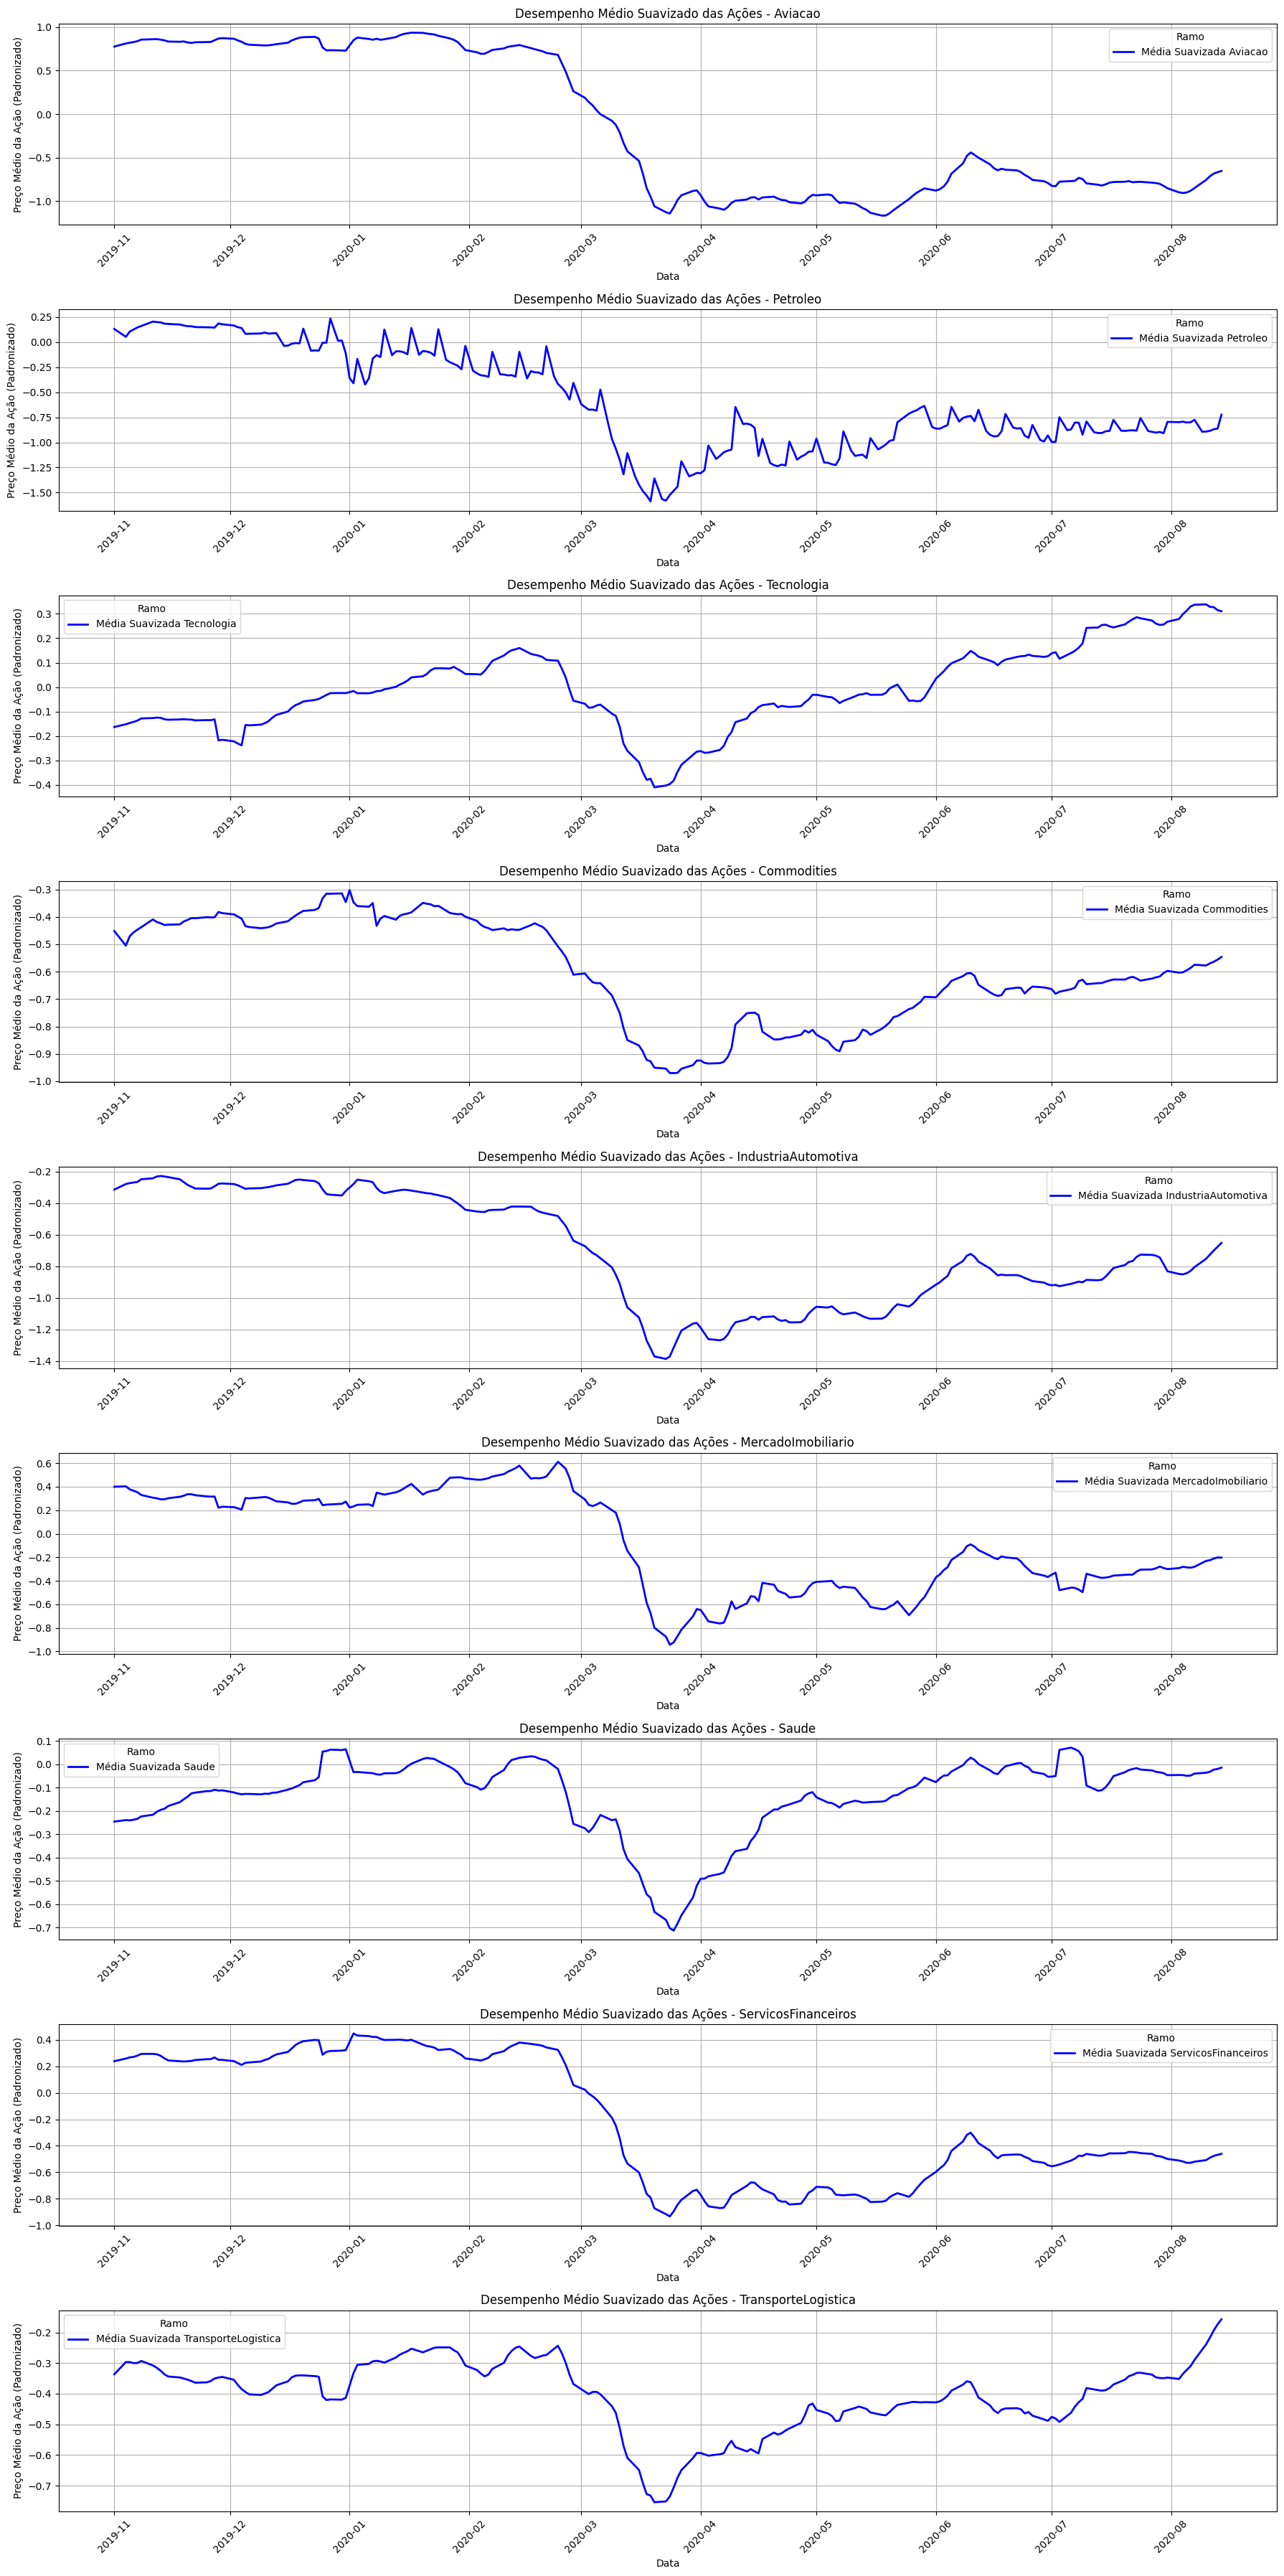

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_linha_media_ramos_com_suavizacao(data_inicio=None, data_fim=None):
    # Caminho do arquivo concatenado
    csv_file = r'C:\Projetos\Projeto5\Dados\concatenado2.csv'
    
    # Ler o CSV concatenado
    df = pd.read_csv(csv_file)
    
    # Converter a coluna 'Data' para o formato datetime
    df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')

    # Se fornecido, filtrar o DataFrame pelas datas especificadas
    if data_inicio:
        data_inicio = pd.to_datetime(data_inicio, format='%d.%m.%Y')
        df = df[df['Data'] >= data_inicio]
    if data_fim:
        data_fim = pd.to_datetime(data_fim, format='%d.%m.%Y')
        df = df[df['Data'] <= data_fim]

    # Listar os ramos de interesse
    ramos = ['Aviacao', 'Petroleo', 'Tecnologia', 'Commodities', 'IndustriaAutomotiva', 'MercadoImobiliario', 'Saude', 'ServicosFinanceiros', 'TransporteLogistica']  # Adicione mais ramos conforme necessário
    
    # Criar uma figura para os gráficos, com número de linhas igual ao número de ramos
    num_ramos = len(ramos)
    plt.figure(figsize=(18, 4 * num_ramos))  # Ajusta a altura com base no número de ramos

    # Loop através dos ramos e plotar apenas a linha média suavizada
    for i, ramo in enumerate(ramos, 1):
        # Filtrar o DataFrame para o ramo atual
        df_ramo = df[df['Ramo'] == ramo]
        
        # Calcular a linha média do ramo
        df_media = df_ramo.groupby('Data')['Ultimo_Padronizado'].mean().reset_index()

        # Suavização usando média móvel (janela de 10 dias, por exemplo)
        df_media['Ultimo_Padronizado_Suavizado'] = df_media['Ultimo_Padronizado'].rolling(window=5, min_periods=1).mean()
        
        # Criar gráfico para a linha média suavizada do ramo
        plt.subplot(num_ramos, 1, i)
        plt.plot(df_media['Data'], df_media['Ultimo_Padronizado_Suavizado'], label=f'Média Suavizada {ramo}', color='blue', linestyle='-', linewidth=2)

        # Configurações do gráfico
        plt.title(f'Desempenho Médio Suavizado das Ações - {ramo}')
        plt.xlabel('Data')
        plt.ylabel('Preço Médio da Ação (Padronizado)')
        plt.xticks(rotation=45)
        plt.legend(title='Ramo')
        plt.grid()

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Executar a função com filtro de datas
# Modifique as datas conforme necessário no formato 'dd.mm.yyyy'
data_inicio = '01.11.2019'
data_fim = '15.08.2020'

plotar_linha_media_ramos_com_suavizacao(data_inicio, data_fim)



Ramo: Aviacao
Desvio padrão do ramo Aviacao entre 01.01.2014 e 01.02.2020: 0.0290
Desvio padrão do ramo Aviacao entre 02.02.2020 e 31.12.2021: 0.4566
Desvio padrão do ramo Aviacao entre 01.01.2022 e 01.10.2024: 0.1921

Diferença entre o primeiro e o segundo período: 0.4276 (1475.20%)
Diferença entre o segundo e o terceiro período: -0.2645 (-57.94%)
Diferença entre o primeiro e o terceiro período: 0.1631 (562.59%)

Ramo: Petroleo
Desvio padrão do ramo Petroleo entre 01.01.2014 e 01.02.2020: 0.2151
Desvio padrão do ramo Petroleo entre 02.02.2020 e 31.12.2021: 0.4491
Desvio padrão do ramo Petroleo entre 01.01.2022 e 01.10.2024: 0.2206

Diferença entre o primeiro e o segundo período: 0.2340 (108.81%)
Diferença entre o segundo e o terceiro período: -0.2285 (-50.87%)
Diferença entre o primeiro e o terceiro período: 0.0056 (2.58%)

Ramo: Tecnologia
Desvio padrão do ramo Tecnologia entre 01.01.2014 e 01.02.2020: 0.0332
Desvio padrão do ramo Tecnologia entre 02.02.2020 e 31.12.2021: 0.4539
Des

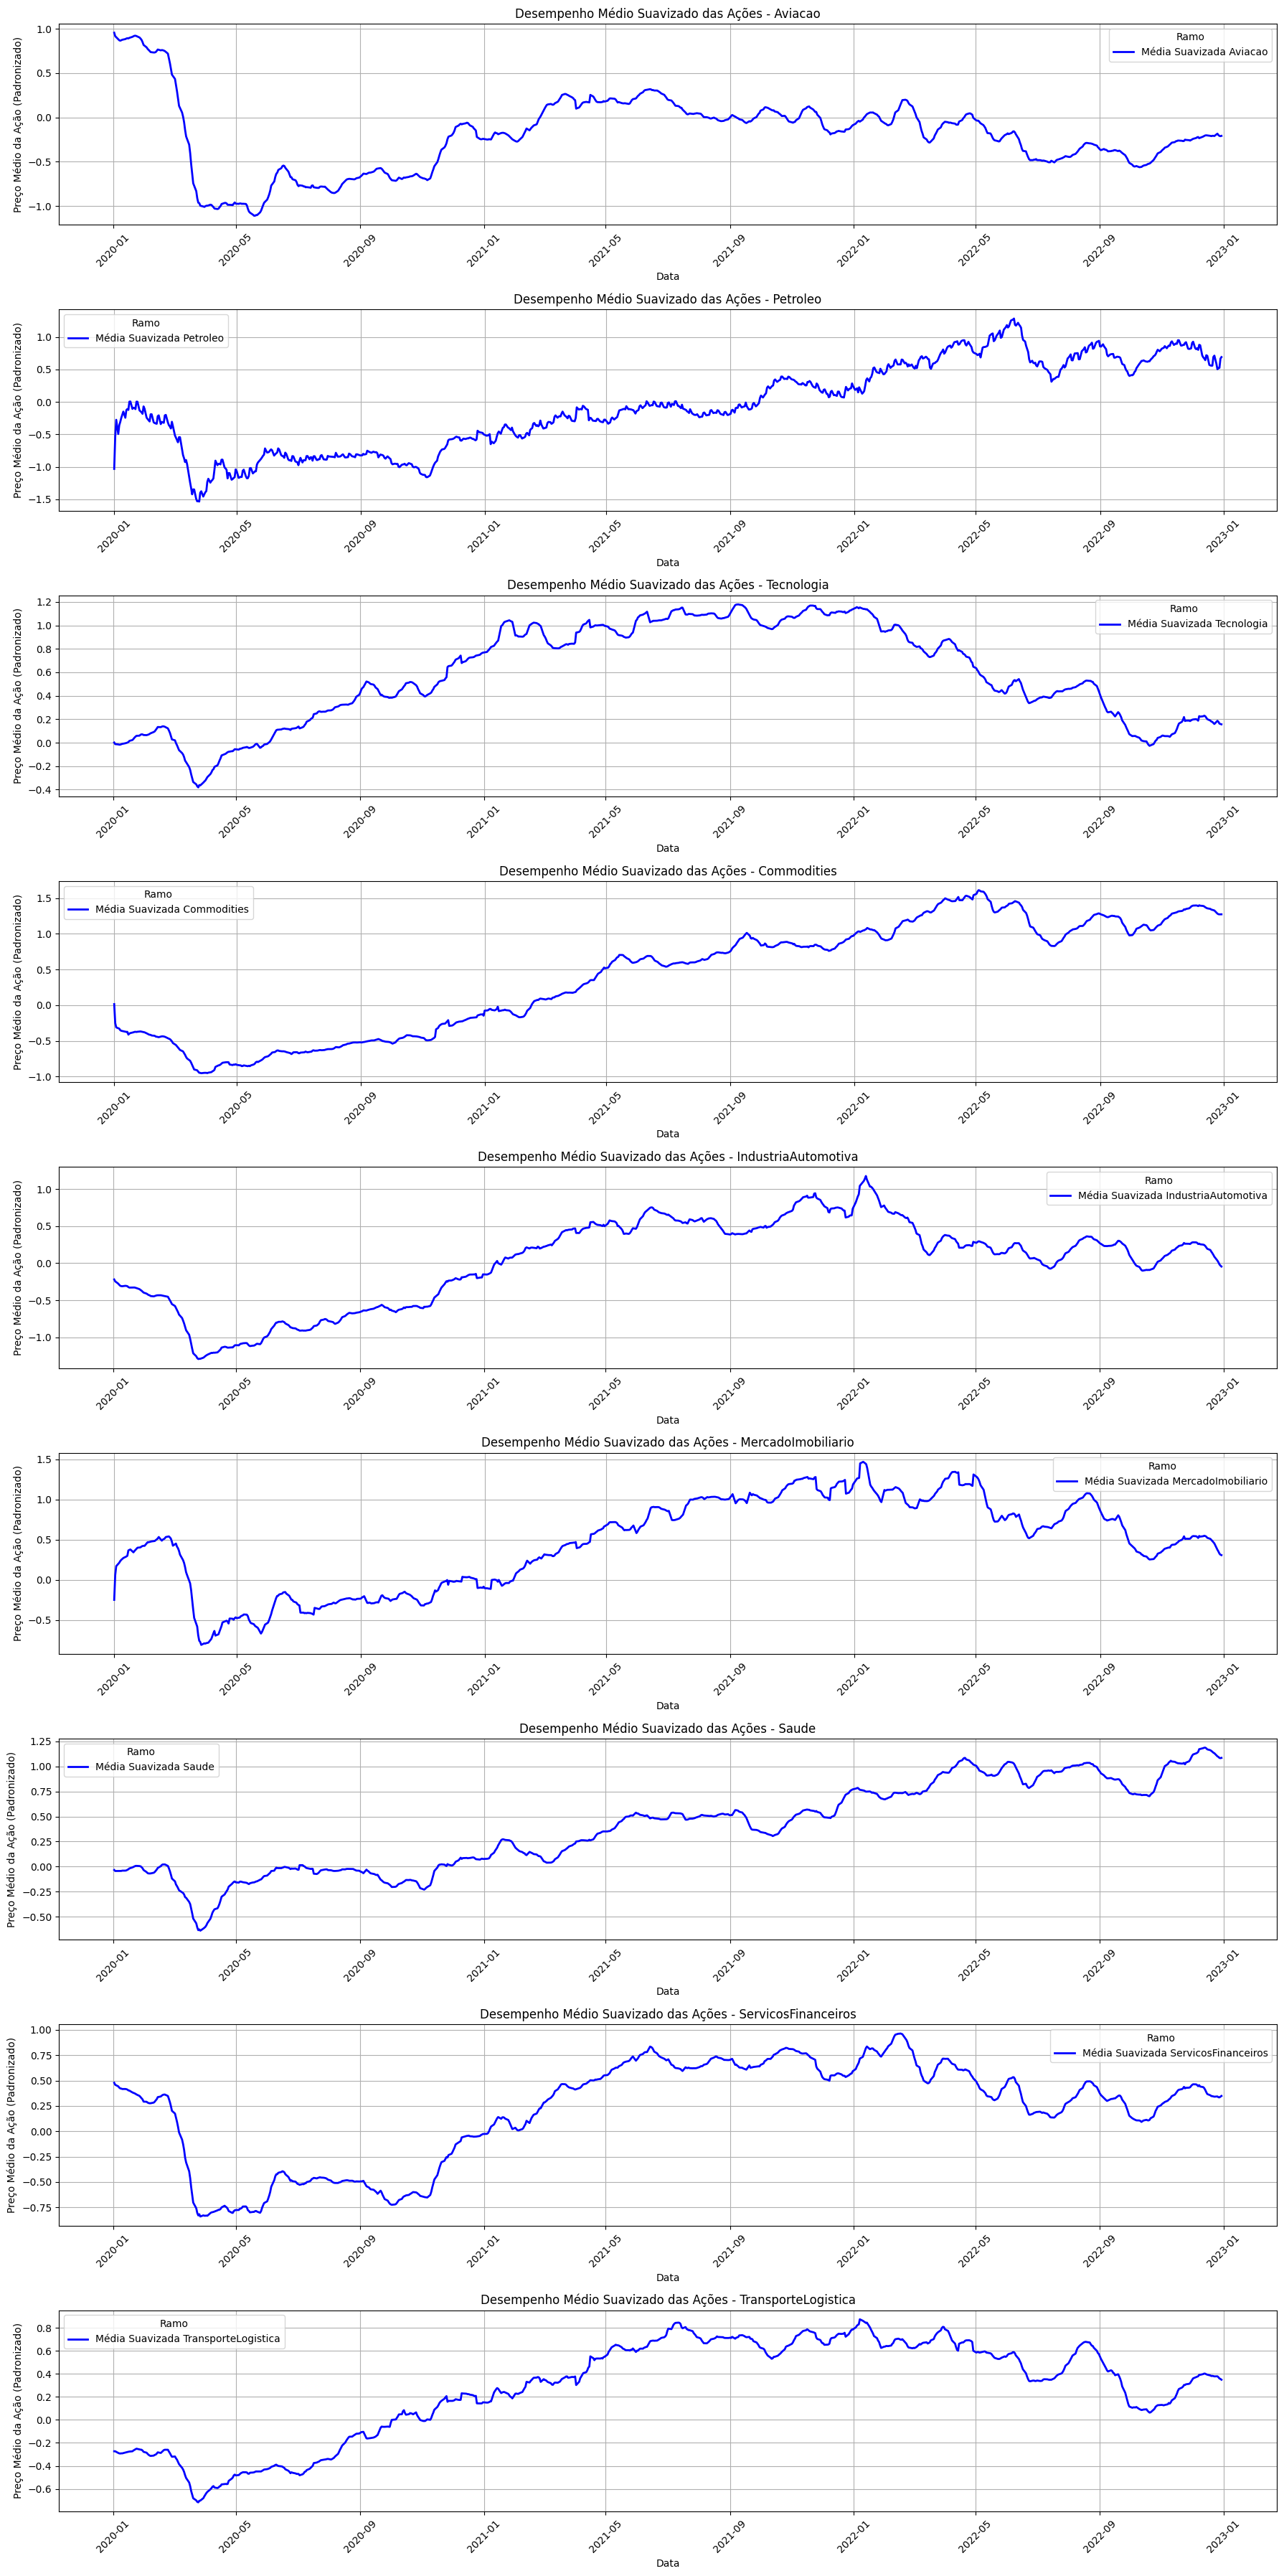


Maiores diferenças entre os períodos:

Ramo: Aviacao
Diferença entre o primeiro e o segundo período: 0.4276 (1475.20%)
Diferença entre o segundo e o terceiro período: -0.2645 (-57.94%)
Diferença entre o primeiro e o terceiro período: 0.1631 (562.59%)

Ramo: Petroleo
Diferença entre o primeiro e o segundo período: 0.2340 (108.81%)
Diferença entre o segundo e o terceiro período: -0.2285 (-50.87%)
Diferença entre o primeiro e o terceiro período: 0.0056 (2.58%)

Ramo: Tecnologia
Diferença entre o primeiro e o segundo período: 0.4206 (1265.34%)
Diferença entre o segundo e o terceiro período: -0.1271 (-28.00%)
Diferença entre o primeiro e o terceiro período: 0.2936 (883.10%)

Ramo: Commodities
Diferença entre o primeiro e o segundo período: 0.5356 (627.18%)
Diferença entre o segundo e o terceiro período: -0.4310 (-69.40%)
Diferença entre o primeiro e o terceiro período: 0.1047 (122.55%)

Ramo: IndustriaAutomotiva
Diferença entre o primeiro e o segundo período: 0.6241 (1526.88%)
Diferença en

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_e_calcular_desvio_padrao(data_inicio=None, data_fim=None, periodos=None):
    # Caminho do arquivo concatenado
    csv_file = r'C:\Projetos\Projeto5\Dados\concatenado2.csv'
    
    # Ler o CSV concatenado
    df = pd.read_csv(csv_file)
    
    # Converter a coluna 'Data' para o formato datetime
    df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')

    # Se fornecido, filtrar o DataFrame pelas datas especificadas
    if data_inicio:
        data_inicio = pd.to_datetime(data_inicio, format='%d.%m.%Y')
        df = df[df['Data'] >= data_inicio]
    if data_fim:
        data_fim = pd.to_datetime(data_fim, format='%d.%m.%Y')
        df = df[df['Data'] <= data_fim]

    # Listar os ramos de interesse
    ramos = ['Aviacao', 'Petroleo', 'Tecnologia', 'Commodities', 'IndustriaAutomotiva', 'MercadoImobiliario', 'Saude', 'ServicosFinanceiros', 'TransporteLogistica']  # Adicione mais ramos conforme necessário
    
    # Criar uma figura para os gráficos, com número de linhas igual ao número de ramos
    num_ramos = len(ramos)
    plt.figure(figsize=(18, 4 * num_ramos))  # Ajusta a altura com base no número de ramos

    # Variável para armazenar as maiores diferenças
    maiores_diferencas = []

    # Loop através dos ramos e plotar apenas a linha média suavizada
    for i, ramo in enumerate(ramos, 1):
        # Filtrar o DataFrame para o ramo atual
        df_ramo = df[df['Ramo'] == ramo]
        
        # Calcular a linha média do ramo
        df_media = df_ramo.groupby('Data')['Ultimo_Padronizado'].mean().reset_index()

        # Suavização usando média móvel (janela de 10 dias, por exemplo)
        df_media['Ultimo_Padronizado_Suavizado'] = df_media['Ultimo_Padronizado'].rolling(window=10, min_periods=1).mean()
        
        # Criar gráfico para a linha média suavizada do ramo
        plt.subplot(num_ramos, 1, i)
        plt.plot(df_media['Data'], df_media['Ultimo_Padronizado_Suavizado'], label=f'Média Suavizada {ramo}', color='blue', linestyle='-', linewidth=2)

        # Configurações do gráfico
        plt.title(f'Desempenho Médio Suavizado das Ações - {ramo}')
        plt.xlabel('Data')
        plt.ylabel('Preço Médio da Ação (Padronizado)')
        plt.xticks(rotation=45)
        plt.legend(title='Ramo')
        plt.grid()

        # Cálculo e impressão do desvio padrão para os períodos fornecidos
        if periodos:
            desvios = []
            print(f"\nRamo: {ramo}")
            for periodo in periodos:
                periodo_inicio, periodo_fim = pd.to_datetime(periodo[0], format='%d.%m.%Y'), pd.to_datetime(periodo[1], format='%d.%m.%Y')
                df_periodo = df_media[(df_media['Data'] >= periodo_inicio) & (df_media['Data'] <= periodo_fim)]
                desvio_padrao = df_periodo['Ultimo_Padronizado_Suavizado'].std()
                desvios.append(desvio_padrao)
                print(f'Desvio padrão do ramo {ramo} entre {periodo_inicio.strftime("%d.%m.%Y")} e {periodo_fim.strftime("%d.%m.%Y")}: {desvio_padrao:.4f}')
            
            # Verificar se existem pelo menos 3 desvios calculados para comparar
            if len(desvios) == 3:
                # Diferença absoluta e percentual
                dif_1_2 = desvios[1] - desvios[0]
                dif_2_3 = desvios[2] - desvios[1]
                dif_1_3 = desvios[2] - desvios[0]

                pct_1_2 = (dif_1_2 / desvios[0]) * 100 if desvios[0] != 0 else 0
                pct_2_3 = (dif_2_3 / desvios[1]) * 100 if desvios[1] != 0 else 0
                pct_1_3 = (dif_1_3 / desvios[0]) * 100 if desvios[0] != 0 else 0

                print(f"\nDiferença entre o primeiro e o segundo período: {dif_1_2:.4f} ({pct_1_2:.2f}%)")
                print(f"Diferença entre o segundo e o terceiro período: {dif_2_3:.4f} ({pct_2_3:.2f}%)")
                print(f"Diferença entre o primeiro e o terceiro período: {dif_1_3:.4f} ({pct_1_3:.2f}%)")

                # Armazenar as maiores diferenças para facilitar visualização posterior
                maiores_diferencas.append({
                    'ramo': ramo,
                    'dif_1_2': dif_1_2, 'pct_1_2': pct_1_2,
                    'dif_2_3': dif_2_3, 'pct_2_3': pct_2_3,
                    'dif_1_3': dif_1_3, 'pct_1_3': pct_1_3
                })

    # Ajustar layout
    plt.tight_layout()
    plt.show()

    # Imprimir as maiores diferenças após o loop
    print("\nMaiores diferenças entre os períodos:")
    for item in maiores_diferencas:
        print(f"\nRamo: {item['ramo']}")
        print(f"Diferença entre o primeiro e o segundo período: {item['dif_1_2']:.4f} ({item['pct_1_2']:.2f}%)")
        print(f"Diferença entre o segundo e o terceiro período: {item['dif_2_3']:.4f} ({item['pct_2_3']:.2f}%)")
        print(f"Diferença entre o primeiro e o terceiro período: {item['dif_1_3']:.4f} ({item['pct_1_3']:.2f}%)")

# Executar a função com filtro de datas e períodos para calcular o desvio padrão
data_inicio = '01.01.2020'
data_fim = '31.12.2022'

# Períodos para calcular o desvio padrão (lista de tuplas com data início e data fim)
periodos = [
    ('01.01.2014', '01.02.2020'),
    ('02.02.2020', '31.12.2021'),
    ('01.01.2022', '01.10.2024')
]

plotar_e_calcular_desvio_padrao(data_inicio, data_fim, periodos)
